In [1]:
!pip install spacepy
!pip install cdflib
!pip install matplotlib

In [2]:
from spacepy import pycdf
import cdflib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
#dmsp-f16_ssm_magnetometer_20130601_v1.0.4.cdf
![Binder](https://mybinder.org/badge_logo.svg)(https://mybinder.org/v2/gh/lkilcommons/OvationPyme/HEAD?labpath=notebooks%2FInteractiveWithHemisphericPower.ipynb)

"[Binder]" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Unidades de las variables en el archivo CDF:
Variable: Epoch, Unidades: ms
Variable: ELE_COUNTS_OBS, Unidades: Sin unidades definidas
Variable: ELE_COUNTS_BKG, Unidades: Sin unidades definidas
Variable: ELE_DIFF_ENERGY_FLUX, Unidades: eV/cm2/delta-eV/ster/s
Variable: ELE_DIFF_ENERGY_FLUX_STD, Unidades: (fractional)
Variable: ELE_TOTAL_ENERGY_FLUX, Unidades: eV/cm2/ster/s
Variable: ELE_TOTAL_ENERGY_FLUX_STD, Unidades: (fractional)
Variable: ELE_AVG_ENERGY, Unidades: eV
Variable: ELE_AVG_ENERGY_STD, Unidades: (fractional)
Variable: ION_COUNTS_OBS, Unidades: Sin unidades definidas
Variable: ION_COUNTS_BKG, Unidades: Sin unidades definidas
Variable: ION_DIFF_ENERGY_FLUX, Unidades: eV/cm2/delta-eV/ster/s
Variable: ION_DIFF_ENERGY_FLUX_STD, Unidades: (fractional)
Variable: ION_TOTAL_ENERGY_FLUX, Unidades: eV/cm2/ster/s
Variable: ION_TOTAL_ENERGY_FLUX_STD, Unidades: (fractional)
Variable: ION_AVG_ENERGY, Unidades: eV
Variable: ION_AVG_ENERGY_STD, Unidades: (fractional)
Variable: SC_ECI, Unida

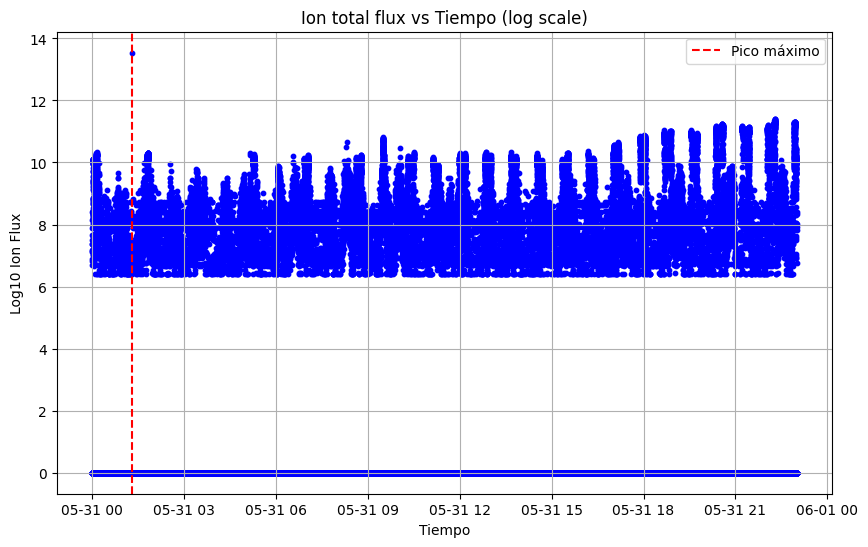

82801


In [3]:
archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')
info = archivo.cdf_info()

tiempo = archivo.varget('Epoch')
total_i_flux = archivo.varget('ION_TOTAL_ENERGY_FLUX')
ION_AVG_ENERGY = archivo.varget('ION_AVG_ENERGY')
ELE_DIFF_ENERGY_FLUX = archivo.varget('ELE_DIFF_ENERGY_FLUX')
CHANNEL_ENERGIES = archivo.varget('CHANNEL_ENERGIES')
ION_DIFF_ENERGY_FLUX = archivo.varget('ION_DIFF_ENERGY_FLUX')
log_i_flux = [math.log10(elem) if elem > 0 else float('nan') for elem in total_i_flux]
variables = info.zVariables
#print(tiempo)
# Mostrar las unidades de cada variable
print("Unidades de las variables en el archivo CDF:")
for var in variables:
    # Obtener los atributos de la variable
    atributos = archivo.varattsget(var)
    
    # Verificar si existe el atributo de unidades
    unidades = atributos.get('UNITS', 'Sin unidades definidas')
    
    print(f"Variable: {var}, Unidades: {unidades}")

N1, N2 = 0, len(total_i_flux)  # Tomar todos los datos
log_i_flux=[]
I=N1
for elem in total_i_flux:
    if I <= N2:
        if elem > 0:
            log_i_flux.append(math.log10(elem))
            I+=1
        else:
            log_i_flux.append(elem)
            I+=1
#necesario para que sea legible
tiempo_final = cdflib.cdfepoch.to_datetime(tiempo)
max_flux = max(total_i_flux)
max_idx = total_i_flux.tolist().index(max_flux)
#print("Flujo máximo:", max_flux)
#print("Índice del flujo máximo:", max_idx)
#print("Tiempo correspondiente:", tiempo_final[max_idx])


# Gráfico con mejoras
plt.figure(figsize=(10, 6))
plt.scatter(tiempo_final, log_i_flux, c='blue', s=10)
plt.axvline(x=tiempo_final[max_idx], color='red', linestyle='--', label='Pico máximo')
plt.xlabel('Tiempo')
plt.ylabel('Log10 Ion Flux')
plt.title('Ion total flux vs Tiempo (log scale)')
plt.legend()
plt.grid(True)
plt.show()
contador =0
for elem in ION_AVG_ENERGY:
    contador += 1

print(contador)

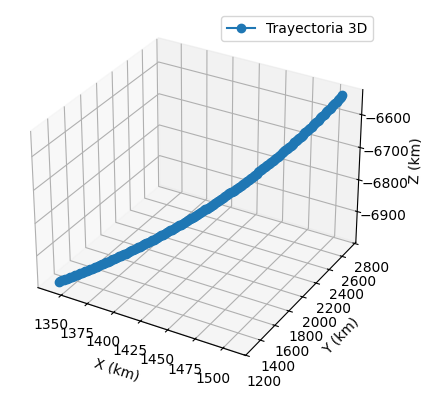

In [4]:
# Carga del archivo CDF
archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')

# Obtener las variables
latitud = archivo.varget('SC_GEOCENTRIC_LAT')  # Latitud en grados
longitud = archivo.varget('SC_GEOCENTRIC_LON')  # Longitud en grados
altitud = archivo.varget("SC_GEOCENTRIC_R")  # Radio geocéntrico en km

# Selección de rango de datos
N1, N2 = 100, 300

# Convertir latitud y longitud de grados a radianes
lat_rad = np.radians(latitud[N1:N2+1])
lon_rad = np.radians(longitud[N1:N2+1])
r = altitud[N1:N2+1]

# Conversión a coordenadas cartesianas
x = r * np.cos(lat_rad) * np.cos(lon_rad)
y = r * np.cos(lat_rad) * np.sin(lon_rad)
z = r * np.sin(lat_rad)

# Graficar la trayectoria en 3D
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(x, y, z, label="Trayectoria 3D", marker="o")

# Etiquetas y leyenda
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Z (km)")
plt.legend()
plt.show()

Variables disponibles: ['Epoch', 'ELE_COUNTS_OBS', 'ELE_COUNTS_BKG', 'ELE_DIFF_ENERGY_FLUX', 'ELE_DIFF_ENERGY_FLUX_STD', 'ELE_TOTAL_ENERGY_FLUX', 'ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY', 'ELE_AVG_ENERGY_STD', 'ION_COUNTS_OBS', 'ION_COUNTS_BKG', 'ION_DIFF_ENERGY_FLUX', 'ION_DIFF_ENERGY_FLUX_STD', 'ION_TOTAL_ENERGY_FLUX', 'ION_TOTAL_ENERGY_FLUX_STD', 'ION_AVG_ENERGY', 'ION_AVG_ENERGY_STD', 'SC_ECI', 'SC_GEOCENTRIC_LAT', 'SC_GEOCENTRIC_LON', 'SC_GEOCENTRIC_R', 'SC_AACGM_LAT', 'SC_AACGM_LON', 'SC_AACGM_LTIME', 'CHANNEL_ENERGIES', 'metavar0']
[30.    20.4   13.9    9.45   6.46   4.4    3.     2.04   1.39   0.949
  0.646  0.44   0.3    0.204  0.139  0.095  0.065  0.044  0.03 ]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Índice del pico: 15453
Flujo máximo: 35643912.0
Energías en el rango 2bi: [30.   20.4  13.9   9.45  6.46  4.4   3.  ]
Latitud magnética del pico: 72.086322014

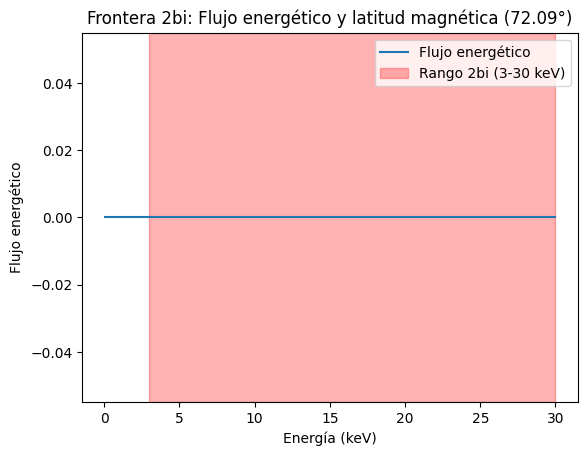

In [5]:
# Ruta al archivo CDF
cdf_file_path = "dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf"

# Cargar archivo CDF
cdf = cdflib.CDF(cdf_file_path)

# Listar las variables disponibles en el archivo
variables = cdf.cdf_info().zVariables
print("Variables disponibles:", variables)

# Variables relevantes
# - Energía de los canales de iones
ion_energy = cdf.varget("CHANNEL_ENERGIES")  # Energías de los canales (keV)

ion_energy=ion_energy/1000 #Traspaso de eV a KeV

print(ion_energy)



# - Flujo diferencial de energía de los iones
ion_flux = cdf.varget("ION_DIFF_ENERGY_FLUX")  # Flujo de energía diferencial
print(ion_flux)
# - Latitud magnética
mag_lat = cdf.varget("SC_AACGM_LAT")  # Latitud magnética asociada a cada instante

# Validar dimensiones
if ion_flux.shape[0] != len(mag_lat):
    raise ValueError("Dimensiones inconsistentes entre flujo de iones y latitud magnética.")

def filter_by_latitude(latitudes, flux, lat_range):
    """
    Filtra los datos de flujo y latitudes según un rango de latitudes.

    :param latitudes: Array de latitudes magnéticas.
    :param flux: Matriz de flujo energético (dimensiones: tiempo x energía).
    :param lat_range: Tupla con el rango de latitudes (min_lat, max_lat).
    :return: Subconjunto de latitudes y flujos dentro del rango especificado.
    """
    min_lat, max_lat = lat_range
    valid_indices = np.where((latitudes >= min_lat) & (latitudes <= max_lat))[0]
    return latitudes[valid_indices], flux[valid_indices, :]

def find_2bi_boundary(ion_energy, ion_flux, mag_lat, lat_range):
    """
    Identifica la frontera 2bi buscando el pico de flujo energético integrado
    en el rango de energía 3-30 keV y determina su posición en latitud magnética.

    :param ion_energy: Array de energías de los iones (keV).
    :param ion_flux: Matriz de flujo energético (dimensiones: tiempo x energía).
    :param mag_lat: Array de latitudes magnéticas asociadas a cada instante de tiempo.
    :param lat_range: Tupla con el rango de latitudes (min_lat, max_lat).
    :return: Índice de tiempo, valor de flujo máximo, energías del rango, y latitud magnética del pico.
    """
    # Filtrar datos por latitud
    filtered_lat, filtered_flux = filter_by_latitude(mag_lat, ion_flux, lat_range)

    # Definir el rango de energía relevante
    min_energy, max_energy = 3, 30

    # Filtrar energías dentro del rango
    valid_indices = np.where((ion_energy >= min_energy) & (ion_energy <= max_energy))[0]
    

    if len(valid_indices) == 0:
        raise ValueError("No se encontraron energías en el rango especificado.")

    # Integrar el flujo energético en el rango seleccionado
    integrated_flux = filtered_flux[:, valid_indices].sum(axis=1)

    # Encontrar el pico del flujo integrado
    peak_index = np.argmax(integrated_flux)
    peak_flux = integrated_flux[peak_index]

    # Energías correspondientes al rango seleccionado
    peak_energy = ion_energy[valid_indices]

    # Latitud magnética asociada al pico
    peak_latitude = filtered_lat[peak_index]

    return peak_index, peak_flux, peak_energy, peak_latitude

# Definir rango de latitudes relevante (50° a 80°)
latitude_range = (50, 80)

# Llamar a la función para encontrar la frontera 2bi
try:
    peak_index, peak_flux, peak_energy, peak_latitude = find_2bi_boundary(ion_energy, ion_flux, mag_lat, latitude_range)
    print(f"Índice del pico: {peak_index}")
    print(f"Flujo máximo: {peak_flux}")
    print(f"Energías en el rango 2bi: {peak_energy}")
    print(f"Latitud magnética del pico: {peak_latitude}")

    # Graficar el flujo energético integrado
    plt.plot(ion_energy, ion_flux[peak_index, :], label="Flujo energético")
    plt.axvspan(3, 30, color='red', alpha=0.3, label="Rango 2bi (3-30 keV)")
    plt.title(f"Frontera 2bi: Flujo energético y latitud magnética ({peak_latitude:.2f}°)")
    plt.xlabel("Energía (keV)")
    plt.ylabel("Flujo energético")
    plt.legend()
    plt.show()

except Exception as e:
    print("Error al procesar los datos:", e)
    


Índice del pico: 74896
Flujo máximo integrado: 14349907.0
Latitud magnética correspondiente: -30.66°


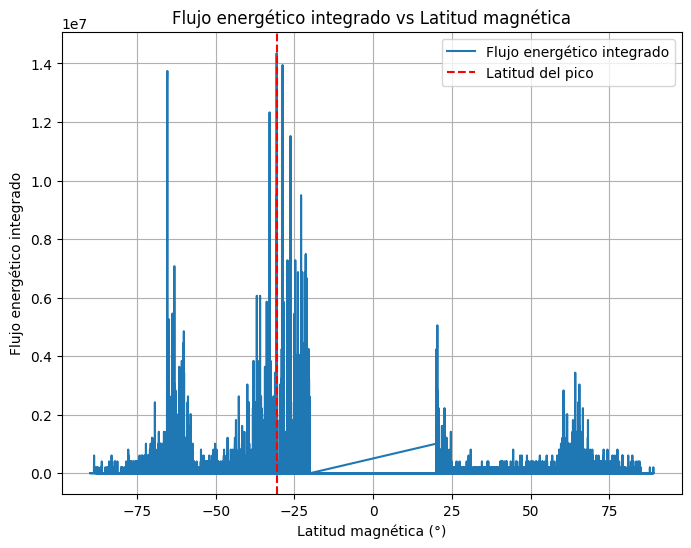

In [6]:
# Variables de entrada (energía de iones, flujo de iones y latitud magnética)
ion_energy = np.array([30000., 20400., 13900., 9450., 6460., 4400., 3000., 2040.,
                       1390., 949., 646., 440., 300., 204., 139., 95., 65., 44., 30.])
ion_flux = np.nan_to_num(ion_flux)  # Limpiar NaN de los datos de flujo de iones
lat_magnetic = mag_lat  # Asumiendo que 'mag_lat' contiene las latitudes magnéticas

# 1. Filtrar energías dentro del rango (hasta 30 keV)
max_energy_keV = 30
valid_indices = np.where(ion_energy <= max_energy_keV)[0]  # Índices válidos de energía

if len(valid_indices) > 0:
    # 2. Integrar el flujo energético de iones dentro del rango válido
    integrated_flux = np.sum(ion_flux[:, valid_indices], axis=1)
    
    # 3. Encontrar el índice donde el flujo energético es máximo
    peak_index = np.argmax(integrated_flux)
    peak_flux = integrated_flux[peak_index]
    peak_latitude = lat_magnetic[peak_index]

    print(f"Índice del pico: {peak_index}")
    print(f"Flujo máximo integrado: {peak_flux}")
    print(f"Latitud magnética correspondiente: {peak_latitude:.2f}°")

    # 4. Graficar el flujo energético integrado vs latitud magnética
    plt.figure(figsize=(8, 6))
    plt.plot(lat_magnetic, integrated_flux, label="Flujo energético integrado")
    plt.axvline(peak_latitude, color='r', linestyle='--', label="Latitud del pico")
    plt.title("Flujo energético integrado vs Latitud magnética")
    plt.xlabel("Latitud magnética (°)")
    plt.ylabel("Flujo energético integrado")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No se encontraron energías en el rango especificado (hasta 30 keV).")


2013-05-31T22:16:54.000000000
80214


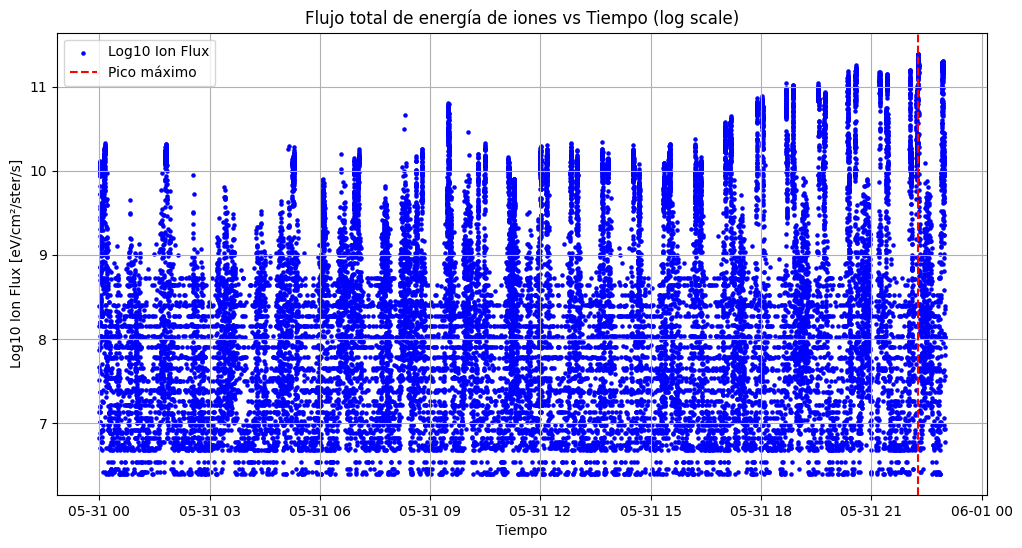

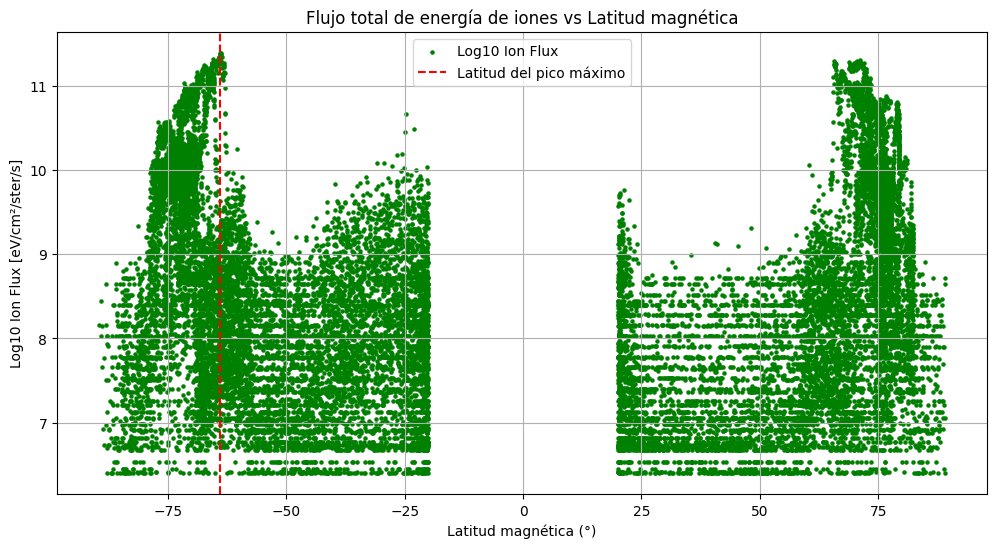

Flujo máximo de energía de iones: 2.46e+11 eV/cm²/ster/s
Índice del flujo máximo: 80214
Tiempo correspondiente: 2013-05-31T22:16:54.000000000
Latitud magnética correspondiente: -64.01°


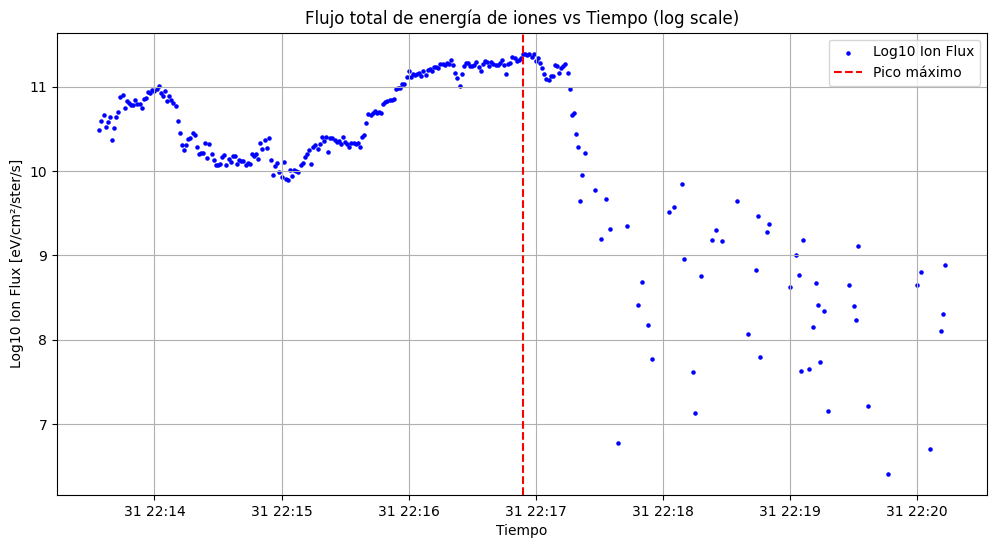

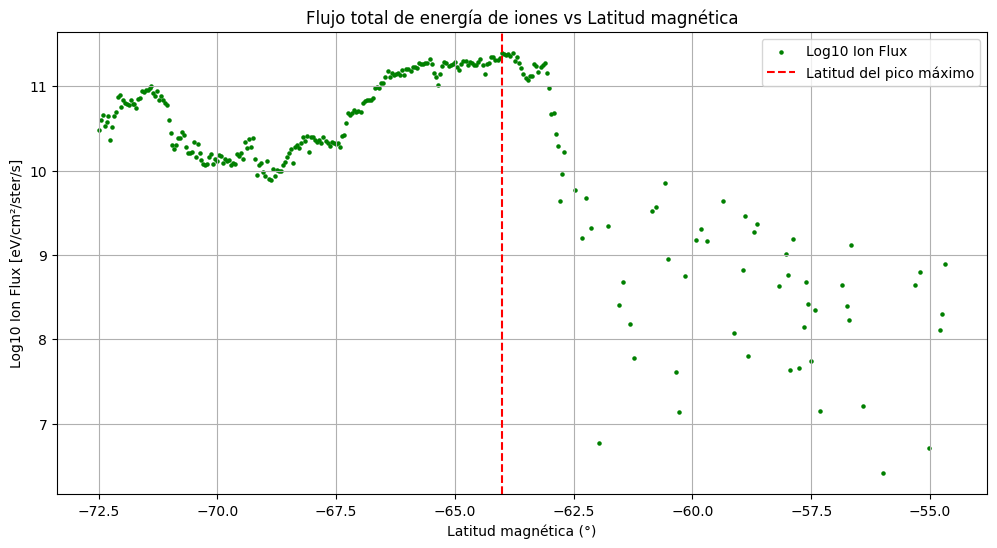

Flujo máximo de energía de iones: 2.46e+11 eV/cm²/ster/s
Índice del flujo máximo: 80214
Tiempo correspondiente: 2013-05-31T22:16:54.000000000
Latitud magnética correspondiente: -64.01°


In [7]:
# Cargar archivo CDF
archivo_cdf = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')

# Extraer variables necesarias ION_DIFF_ENERGY_FLUX
tiempo = archivo_cdf.varget('Epoch')  # Tiempo en milisegundos
ion_flux = archivo_cdf.varget('ION_TOTAL_ENERGY_FLUX')  # Flujo total de energía de iones
latitud_magnetica = archivo_cdf.varget('SC_AACGM_LAT')  # Latitud geomagnética en grados

# Convertir tiempo a formato legible
tiempo_final = cdflib.cdfepoch.to_datetime(tiempo)

# Logaritmo base 10 del flujo de energía para mejorar visualización
LOG_ion_flux = [math.log10(flujo) if flujo > 0 else np.nan for flujo in ion_flux]
log_ion_flux = [num if num <= 13 else np.nan for num in LOG_ion_flux]



# Encontrar el índice del pico máximo de flujo
indice_max_flux = np.nanargmax(log_ion_flux)
max_flux = ion_flux[indice_max_flux]
tiempo_max_flux = tiempo_final[indice_max_flux]
latitud_max_flux = latitud_magnetica[indice_max_flux]
tiempo = list(tiempo_final)
print(tiempo_max_flux)

tempo = []
for i in tiempo:
    tempo.append(str(i))
buscado =(tempo.index(str(tiempo_max_flux), 0, len(tempo)))
l1,l2=buscado-200,buscado+200
print(buscado)

# Graficar el flujo total de energía de iones en función del tiempo
plt.figure(figsize=(12, 6))
plt.scatter(tiempo_final, log_ion_flux, s=5, c='b', label='Log10 Ion Flux')  # Log del flujo
plt.axvline(tiempo_max_flux, color='r', linestyle='--', label='Pico máximo')  # Línea vertical en el pico
plt.xlabel('Tiempo')
plt.ylabel('Log10 Ion Flux [eV/cm²/ster/s]')
plt.title('Flujo total de energía de iones vs Tiempo (log scale)')
plt.legend()
plt.grid()
plt.show()

# Graficar el flujo en función de la latitud magnética
plt.figure(figsize=(12, 6))
plt.scatter(latitud_magnetica, log_ion_flux, s=5, c='g', label='Log10 Ion Flux')  # Log del flujo
plt.axvline(latitud_max_flux, color='r', linestyle='--', label='Latitud del pico máximo')
plt.xlabel('Latitud magnética (°)')
plt.ylabel('Log10 Ion Flux [eV/cm²/ster/s]')
plt.title('Flujo total de energía de iones vs Latitud magnética')
plt.legend()
plt.grid()
plt.show()

# Resultados
print(f"Flujo máximo de energía de iones: {max_flux:.2e} eV/cm²/ster/s")
print(f"Índice del flujo máximo: {indice_max_flux}")
print(f"Tiempo correspondiente: {tiempo_max_flux}")
print(f"Latitud magnética correspondiente: {latitud_max_flux:.2f}°")

# Graficar el flujo total de energía de iones en función del tiempo
plt.figure(figsize=(12, 6))
plt.scatter(tiempo_final[l1:l2], log_ion_flux[l1:l2], s=5, c='b', label='Log10 Ion Flux')  # Log del flujo
plt.axvline(tiempo_max_flux, color='r', linestyle='--', label='Pico máximo')  # Línea vertical en el pico
plt.xlabel('Tiempo')
plt.ylabel('Log10 Ion Flux [eV/cm²/ster/s]')
plt.title('Flujo total de energía de iones vs Tiempo (log scale)')
plt.legend()
plt.grid()
plt.show()

# Graficar el flujo en función de la latitud magnética
plt.figure(figsize=(12, 6))
plt.scatter(latitud_magnetica[l1:l2], log_ion_flux[l1:l2], s=5, c='g', label='Log10 Ion Flux')  # Log del flujo
plt.axvline(latitud_max_flux, color='r', linestyle='--', label='Latitud del pico máximo')
plt.xlabel('Latitud magnética (°)')
plt.ylabel('Log10 Ion Flux [eV/cm²/ster/s]')
plt.title('Flujo total de energía de iones vs Latitud magnética')
plt.legend()
plt.grid()
plt.show()

# Resultados
print(f"Flujo máximo de energía de iones: {max_flux:.2e} eV/cm²/ster/s")
print(f"Índice del flujo máximo: {indice_max_flux}")
print(f"Tiempo correspondiente: {tiempo_max_flux}")
print(f"Latitud magnética correspondiente: {latitud_max_flux:.2f}°")




Índice seleccionado con suficientes datos no NaN: 80164
Cantidad de valores no NaN: 19


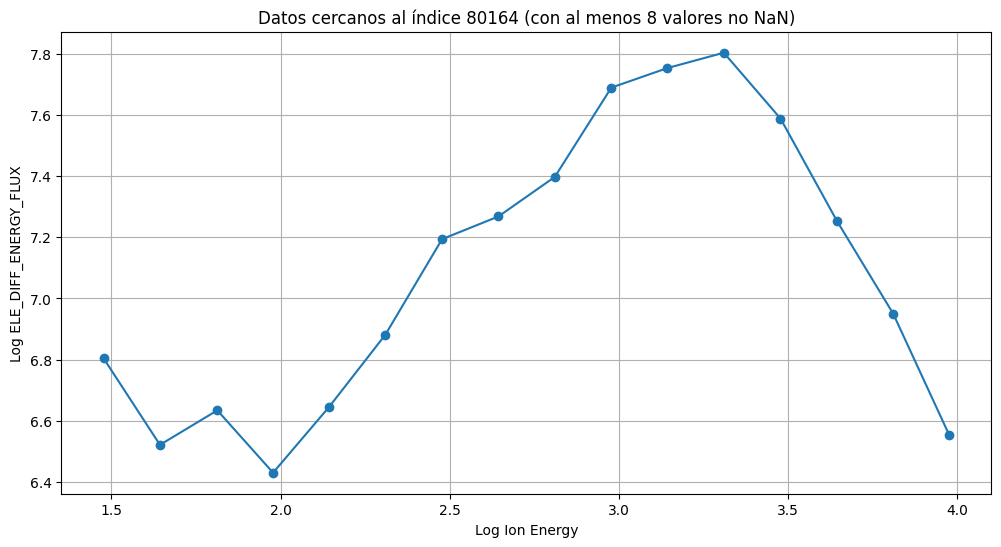

In [8]:
log_ion_energy = [math.log10(flujo) if flujo > 0 else np.nan for flujo in ion_energy]
# Configurar el rango de búsqueda alrededor del índice del flujo máximo
rango_busqueda = range(max(0, buscado - 50), min(len(ELE_DIFF_ENERGY_FLUX), buscado + 50))

# Variables para almacenar el índice con suficientes datos no NaN
indice_seleccionado = None
cantidad_minima_no_nan = 8  # Número mínimo de valores válidos requeridos

# Iterar sobre los índices en el rango de búsqueda
for indice in rango_busqueda:
    datos_actuales = ELE_DIFF_ENERGY_FLUX[indice]  # Lista de datos en este índice
    no_nan_count = np.sum(~np.isnan(datos_actuales))  # Contar valores no NaN
    
    if no_nan_count >= cantidad_minima_no_nan:
        indice_seleccionado = indice
        break  # Salir del bucle una vez encontrado un índice válido

# Validar si se encontró un índice con suficientes valores no NaN
if indice_seleccionado is not None:
    print(f"Índice seleccionado con suficientes datos no NaN: {indice_seleccionado}")
    print(f"Cantidad de valores no NaN: {np.sum(~np.isnan(ELE_DIFF_ENERGY_FLUX[indice_seleccionado]))}")
    
    # Calcular el log10 de los datos seleccionados
    log_ELE_DIFF_ENERGY_FLUX = [
        math.log10(flujo) if flujo > 0 else np.nan for flujo in ELE_DIFF_ENERGY_FLUX[indice_seleccionado]
    ]

    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(log_ion_energy, log_ELE_DIFF_ENERGY_FLUX, linestyle='-', marker='o')
    plt.xlabel('Log Ion Energy')
    plt.ylabel('Log ELE_DIFF_ENERGY_FLUX')
    plt.title(f'Datos cercanos al índice {indice_seleccionado} (con al menos {cantidad_minima_no_nan} valores no NaN)')
    plt.grid()
    plt.show()
else:
    print("No se encontró un índice con suficientes valores no NaN en el rango.")


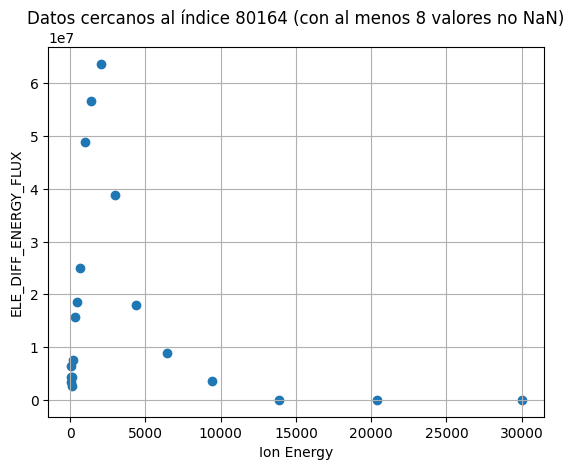

In [9]:
plt.scatter(ion_energy,ELE_DIFF_ENERGY_FLUX[80164])
plt.xlabel('Ion Energy')
plt.ylabel('ELE_DIFF_ENERGY_FLUX')
plt.title(f'Datos cercanos al índice {indice_seleccionado} (con al menos {cantidad_minima_no_nan} valores no NaN)')
plt.grid()
plt.show()

In [ ]:
import numpy as np
print("Tipos de datos:", ION_DIFF_ENERGY_FLUX.dtype)

# Verifica que `CHANNEL_ENERGIES` y `ION_DIFF_ENERGY_FLUX` estén definidos.
print(ION_DIFF_ENERGY_FLUX)

# Define los límites de energía (Ev)
Ec2 = CHANNEL_ENERGIES[:17]  # Energías de canal superior.
Ec1 = CHANNEL_ENERGIES[1:18]  # Energías de canal inferior.

# Calcula los anchos de las bandas energéticas
medios = [(e2 - e1) / 2 for e1, e2 in zip(Ec1, Ec2)]
Left = CHANNEL_ENERGIES[1] - CHANNEL_ENERGIES[0]  # Extremo izquierdo.
Rigth = CHANNEL_ENERGIES[17] - CHANNEL_ENERGIES[16]  # Extremo derecho.
medios.insert(0, Left)  # Añade el intervalo izquierdo.
medios.append(Rigth)  # Añade el intervalo derecho.




# Filtra NaNs de los datos de flujo.
ION_DIFF_ENERGY_FLUX = np.array(ION_DIFF_ENERGY_FLUX, dtype=np.float64)


# Filtra valores NaN y asegura que los datos sean numéricos.
if np.any(np.isnan(ION_DIFF_ENERGY_FLUX)):
    ION_DIFF_ENERGY_FLUX = ION_DIFF_ENERGY_FLUX[~np.isnan(ION_DIFF_ENERGY_FLUX)]

print("ION_DIFF_ENERGY_FLUX después del filtrado:", ION_DIFF_ENERGY_FLUX)


transito =[]

# Continua con el cálculo
for elem in ION_DIFF_ENERGY_FLUX:
    transito.append(elem * np.array(medios))


print("Transito calculado:", transito)

flujo_total = np.sum(transito)
print("Flujo total:", flujo_total)


Tipos de datos: float64
[0. 0. 0. ... 0. 0. 0.]
ION_DIFF_ENERGY_FLUX después del filtrado: [0. 0. 0. ... 0. 0. 0.]
Transito calculado: 